In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.DataFrame(
    {'Milege' : [15,14, 17, 7, 10, 7 , 20,21,18,11,7.9, 8.6, 12.3, 17.1, 19.4],
     'Premium' : [392.5, 46.2, 15.7, 422.2, 119.4, 170.9, 56.9, 77.5, 21.4, 65.3, 250, 220, 217.5, 140.88, 97.25]
    }
)

In [5]:
data

,Milege,Premium
0,15.0,392.50
1,14.0,46.20
2,17.0,15.70
3,7.0,422.20
4,10.0,119.40
5,7.0,170.90
6,20.0,56.90
7,21.0,77.50
8,18.0,21.40
9,11.0,65.30


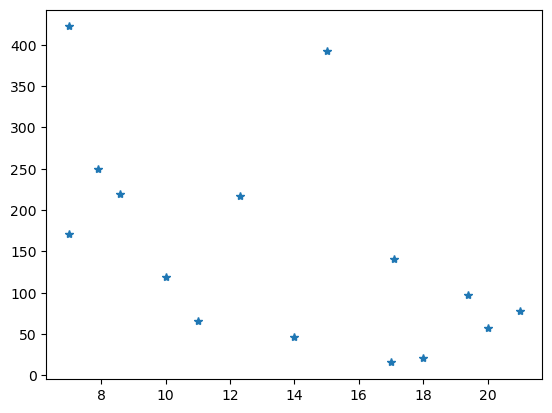

In [6]:
plt.plot(data['Milege'], data['Premium'],'*')

In [7]:
data.corr()

,Milege,Premium
Milege,1.000000,-0.552464
Premium,-0.552464,1.000000


In [8]:
x=data['Milege']
y = data['Premium']

In [9]:
b1 = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)

In [10]:
b1

-14.129881018565644

In [11]:
b0=y.mean()-b1*x.mean()

In [12]:
b0

347.6329715407685

# Session 3

In [32]:
#Error
ypred = b1*data['Milege']+b0
yact = data['Premium']

In [36]:
sse = np.sum((yact-ypred)**2)
sse

154777.6920847789

In [38]:
mse = sse/len(data)
mse

10318.512805651926

In [40]:
rmse = np.sqrt(mse)
rmse

101.58008075234005

### Measures of Variance

In [43]:
ssr = np.sum((y.mean()-ypred)**2)
ssr

67993.4763552211

In [45]:
sst = np.sum((y.mean()-yact)**2)
sst

222771.16843999998

In [49]:
rsqr = ssr/sst
rsqr

0.3052166796599359

In [59]:
import statsmodels.api as sm

In [65]:
xc = sm.add_constant(x)

In [67]:
xc

,const,Milege
0,1.0,15.0
1,1.0,14.0
2,1.0,17.0
3,1.0,7.0
4,1.0,10.0
5,1.0,7.0
6,1.0,20.0
7,1.0,21.0
8,1.0,18.0
9,1.0,11.0


In [69]:
mod = sm.OLS(y,xc)

In [73]:
ols_mod = mod.fit()

In [77]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     5.711
Date:                Sat, 23 Nov 2024   Prob (F-statistic):             0.0327
Time:                        10:10:28   Log-Likelihood:                -90.597
No. Observations:                  15   AIC:                             185.2
Df Residuals:                      13   BIC:                             186.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        347.6330     85.689      4.057      0.001     162.512     532.753
Milege       -14.1299      5.913     -2.390      0.033     -26.904      -1.356
==============================================================================
Omnibus:                        5.842   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.148
Skew:                           1.074   Prob(JB):                        0.207
Kurtosis:                       3.649   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""